In [1]:
from models import run_text_classification

import pandas as pd


In [2]:
import os
import nltk
NLTK_DATA_PATH = os.path.expanduser('/Users/notagain/nltk_data/tokenizers/')

def setup_nltk_path():
    # Create directory if not exists
    os.makedirs(NLTK_DATA_PATH, exist_ok=True)
    
    # Set environment variable
    os.environ['NLTK_DATA'] = NLTK_DATA_PATH
    
    # Configure NLTK to use only this path
    nltk.data.path = [NLTK_DATA_PATH]

def download_nltk_data():
    # Download required resources
    resources = ["treebank", "punkt_tab", "vader_lexicon", "stopwords", "averaged_perceptron_tagger_eng", "wordnet"]
    for resource in resources:
        nltk.download(resource, download_dir=NLTK_DATA_PATH, quiet=True)

setup_nltk_path()
download_nltk_data()

In [3]:
data_path = "/Users/notagain/Desktop/experiments/better_lem.csv"  # Replace with your actual path
df = pd.read_csv(data_path)
df.head()

,rating,text,processed_text
0,5,First: you had the books I wanted for a gift t...,first you book i want gift to voracious reader...
1,5,Great communication about my order. Books arri...,great communication order . book arrive timely...
2,5,I appreciate the selection and the prices of t...,i appreciate selection price item i order . i ...
3,5,The books arrived in a very timely fashion and...,book arrive timely fashion importantly they pa...
4,5,Beautiful books delivered extremely quickly co...,beautiful book deliver extremely quickly consi...


In [5]:
df['rating'].value_counts()

rating
5    94814
1    18171
3    15215
2     7272
4     4533
Name: count, dtype: int64

In [6]:
import pandas as pd

def downsample_highest_to_lowest(df, target_column):
    # Count the occurrences of each class (1-5) in the target column
    class_counts = df[target_column].value_counts().sort_index()
    
    # Get the class with the highest count and the class with the lowest count
    highest_class = class_counts.idxmax()
    lowest_class = class_counts.idxmin()
    
    # Get the count of the lowest class
    lowest_count = class_counts[lowest_class]
    
    # Sample rows from the highest class to match the count of the lowest class
    highest_class_samples = df[df[target_column] == highest_class].sample(n=lowest_count, random_state=42)
    
    # Get all rows that are not part of the highest class
    other_rows = df[df[target_column] != highest_class]
    
    # Combine the sampled highest class rows with the other rows
    balanced_df = pd.concat([other_rows, highest_class_samples])
    
    # Return the balanced DataFrame
    return balanced_df

# Example usage:
# df = pd.DataFrame({
#     'class': [1, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5],
#     'other_column': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
# })
# balanced_df = downsample_highest_to_lowest(df, 'class')
# print(balanced_df)
new_df = downsample_highest_to_lowest(df, "rating")



In [8]:
import pandas as pd

def sample_classes(df, target_column, n_samples):
    # Initialize an empty list to store sampled rows
    sampled_rows = []
    
    # Iterate over each class (1-5)
    for class_value in range(1, 6):
        # Get rows for the current class
        class_rows = df[df[target_column] == class_value]
        
        # Sample min(n_samples, number of rows in the class) rows
        sampled_class_rows = class_rows.sample(n=min(n_samples, len(class_rows)), random_state=42)
        
        # Add the sampled rows to the list
        sampled_rows.append(sampled_class_rows)
    
    # Combine all sampled rows into a single DataFrame
    sampled_df = pd.concat(sampled_rows)
    
    # Return the sampled DataFrame
    return sampled_df

# Example usage:
# df = pd.DataFrame({
#     'class': [1, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5],
#     'other_column': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
# })
sampled_df = sample_classes(df, 'rating', n_samples=5000)
# print(sampled_df)

In [9]:
sampled_df.head()

,rating,text,processed_text
84629,1,I ordered a cashmere cardigan and received a s...,i order cashmere cardigan receive silk one . g...
20657,1,You came to my home days after knee surgery. ...,you come to home day after knee surgery . ask ...
5468,1,Very disappointed … I had to tell the workers ...,disappointed i to tell worker to various time ...
69997,1,Have not received my product yet or any update...,not receive product yet update on arrival .
25265,1,Did not like the answers giving and made me wo...,not like answer give make me worrie please can...


In [11]:
sampled_df['rating'].value_counts()

rating
1    5000
2    5000
3    5000
5    5000
4    4533
Name: count, dtype: int64

In [12]:
import pandas as pd
import asyncio

# Assume your run_text_classification function is defined in a previous cell

# Load your DataFrame


async def main():
    results_df = await run_text_classification(sampled_df, text_column='processed_text', target_column='rating')
    return results_df

# Execute the async function and get the result
results = await main()

2025-01-11 20:16:45,872 - INFO - Starting text classification process.
2025-01-11 20:16:45,903 - INFO - Splitting data into training and testing sets.
2025-01-11 20:16:45,929 - INFO - Applying undersampling to the training data.
2025-01-11 20:16:45,961 - INFO - Initializing lemmatizer.
2025-01-11 20:16:45,962 - INFO - Preprocessing text data.
2025-01-11 20:21:18,400 - INFO - Starting model training and evaluation loop.
2025-01-11 20:21:18,411 - INFO - Vectorizing data using CountVectorizer.
2025-01-11 20:21:19,755 - INFO - Vectorizing data using TfidfVectorizer.
2025-01-11 20:21:21,158 - INFO - Training Logistic Regression...
2025-01-11 20:21:36,303 - INFO - Finished training and evaluating Logistic Regression.
2025-01-11 20:21:36,307 - INFO - Training ElasticNet (Logistic)...
/usr/local/Caskroom/miniconda/base/envs/trust/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
20

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8825
[LightGBM] [Info] Number of data points in the train set: 17795, number of used features: 2334
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


2025-01-12 02:49:36,879 - INFO - Finished training and evaluating LightGBM.
2025-01-12 02:49:36,880 - INFO - Training LinearSVC...
2025-01-12 02:49:56,648 - INFO - Finished training and evaluating LinearSVC.
2025-01-12 02:49:56,648 - INFO - Training Logistic Regression...
2025-01-12 02:49:59,815 - INFO - Finished training and evaluating Logistic Regression.
2025-01-12 02:49:59,816 - INFO - Training ElasticNet (Logistic)...
2025-01-12 02:50:16,509 - INFO - Finished training and evaluating ElasticNet (Logistic).
2025-01-12 02:50:16,510 - INFO - Training Random Forest...
2025-01-12 02:51:01,073 - INFO - Finished training and evaluating Random Forest.
2025-01-12 02:51:01,073 - INFO - Training XGBoost...
/usr/local/Caskroom/miniconda/base/envs/trust/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:51:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1733179604375/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103958
[LightGBM] [Info] Number of data points in the train set: 17795, number of used features: 2334
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


2025-01-12 02:52:00,327 - INFO - Finished training and evaluating LightGBM.
2025-01-12 02:52:00,327 - INFO - Training LinearSVC...
2025-01-12 02:52:00,914 - INFO - Finished training and evaluating LinearSVC.
2025-01-12 02:52:00,916 - INFO - Processing results.
2025-01-12 02:52:00,921 - INFO - Text classification process completed.


In [66]:
results.groupby("Model")[['Vectorizer', "ROC AUC"]].count()

,Vectorizer,ROC AUC
Model,,
ElasticNet (Logistic),2,2
LightGBM,2,2
LinearSVC,2,0
Logistic Regression,2,2
Random Forest,2,2
XGBoost,2,2


In [77]:
results.to_csv('output.csv')


In [75]:
results[results['Model'] == "LinearSVC"].drop

,Model,ROC AUC,Confusion Matrix,accuracy,0_precision,0_recall,0_f1-score,0_support,1_precision,1_recall,...,2_support,3_precision,3_recall,3_f1-score,3_support,4_precision,4_recall,4_f1-score,4_support,Vectorizer
5,LinearSVC,NaN,"[[752, 364, 193, 73, 68], [410, 468, 367, 168,...",0.437398,0.497026,0.518621,0.507594,1450.0,0.341108,0.310345,...,1419.0,0.299912,0.386183,0.337624,883.0,0.651307,0.649966,0.650636,1457.0,CountVectorizer
11,LinearSVC,NaN,"[[841, 319, 160, 74, 56], [427, 477, 363, 158,...",0.463749,0.520421,0.580000,0.548598,1450.0,0.358377,0.316313,...,1419.0,0.325376,0.416761,0.365442,883.0,0.678429,0.699382,0.688746,1457.0,TfidfVectorizer


In [73]:
results.iloc[5]

Model                                                       LinearSVC
ROC AUC                                                           NaN
Confusion Matrix    [[752, 364, 193, 73, 68], [410, 468, 367, 168,...
accuracy                                                     0.437398
0_precision                                                  0.497026
0_recall                                                     0.518621
0_f1-score                                                   0.507594
0_support                                                      1450.0
1_precision                                                  0.341108
1_recall                                                     0.310345
1_f1-score                                                      0.325
1_support                                                      1508.0
2_precision                                                  0.346495
2_recall                                                      0.30303
2_f1-score          

In [13]:
results.head()

,Model,ROC AUC,Confusion Matrix,accuracy,0_precision,0_recall,0_f1-score,0_support,1_precision,1_recall,...,2_support,3_precision,3_recall,3_f1-score,3_support,4_precision,4_recall,4_f1-score,4_support,Vectorizer
0,Logistic Regression,0.776107,"[[549, 247, 122, 42, 26], [242, 313, 259, 101,...",0.473179,0.548452,0.556795,0.552592,986.0,0.347392,0.325026,...,931.0,0.432251,0.418655,0.425344,922.0,0.662953,0.721941,0.691191,989.0,CountVectorizer
1,ElasticNet (Logistic),0.785089,"[[553, 243, 122, 42, 26], [246, 313, 253, 100,...",0.479649,0.551896,0.560852,0.556338,986.0,0.349330,0.325026,...,931.0,0.441472,0.429501,0.435404,922.0,0.658470,0.731041,0.692861,989.0,CountVectorizer
2,Random Forest,0.773982,"[[704, 125, 84, 32, 41], [425, 189, 189, 94, 6...",0.462743,0.464686,0.713996,0.562975,986.0,0.352612,0.196262,...,931.0,0.430946,0.365510,0.395540,922.0,0.590038,0.778564,0.671316,989.0,CountVectorizer
3,XGBoost,0.791026,"[[587, 237, 99, 33, 30], [259, 328, 229, 97, 5...",0.486120,0.561722,0.595335,0.578040,986.0,0.348195,0.340602,...,931.0,0.452962,0.422993,0.437465,922.0,0.648889,0.738119,0.690634,989.0,CountVectorizer
4,LightGBM,0.807259,"[[606, 226, 91, 34, 29], [263, 334, 217, 105, ...",0.503861,0.566355,0.614604,0.589494,986.0,0.370699,0.346833,...,931.0,0.465222,0.442516,0.453585,922.0,0.661092,0.759353,0.706824,989.0,CountVectorizer


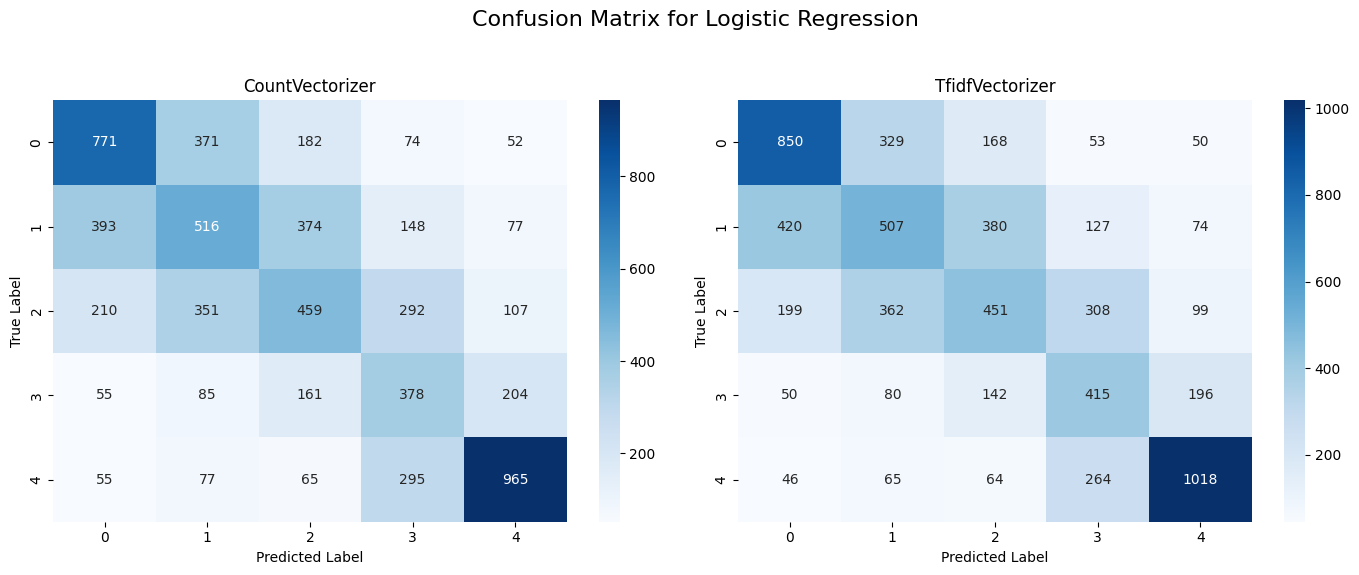

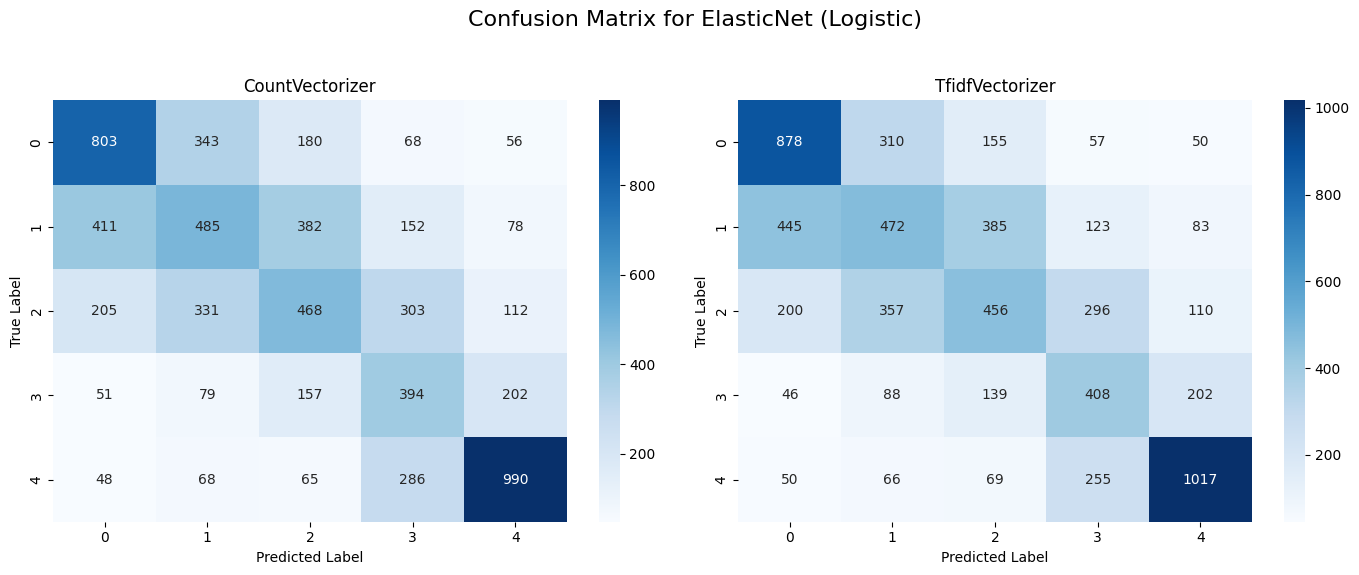

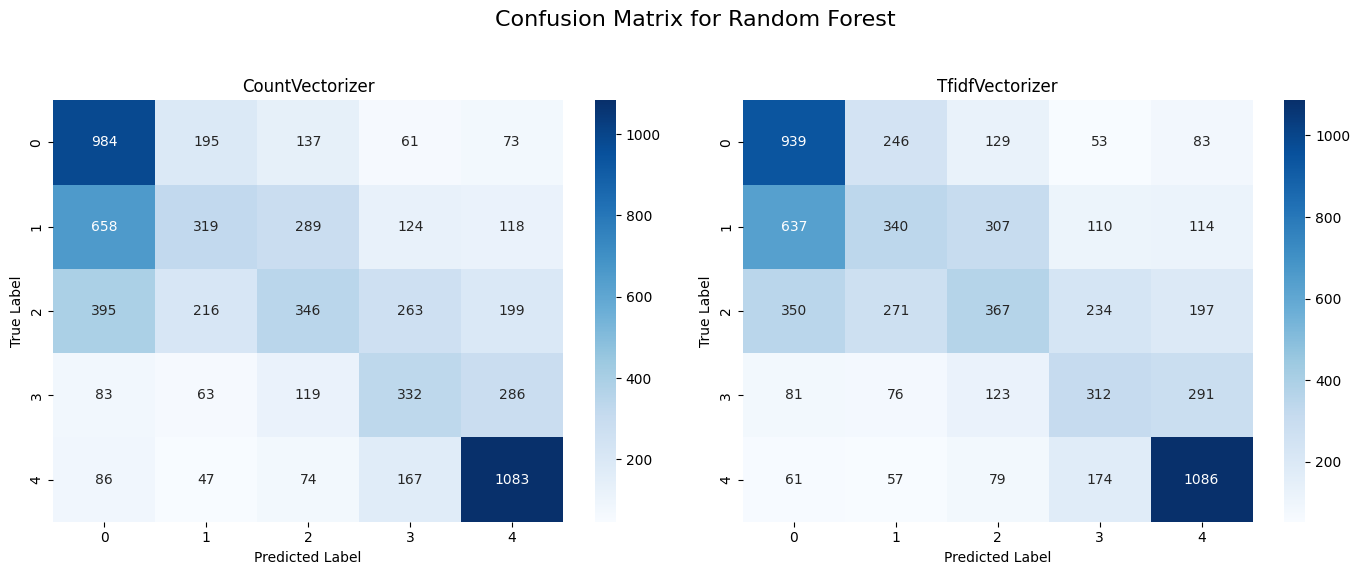

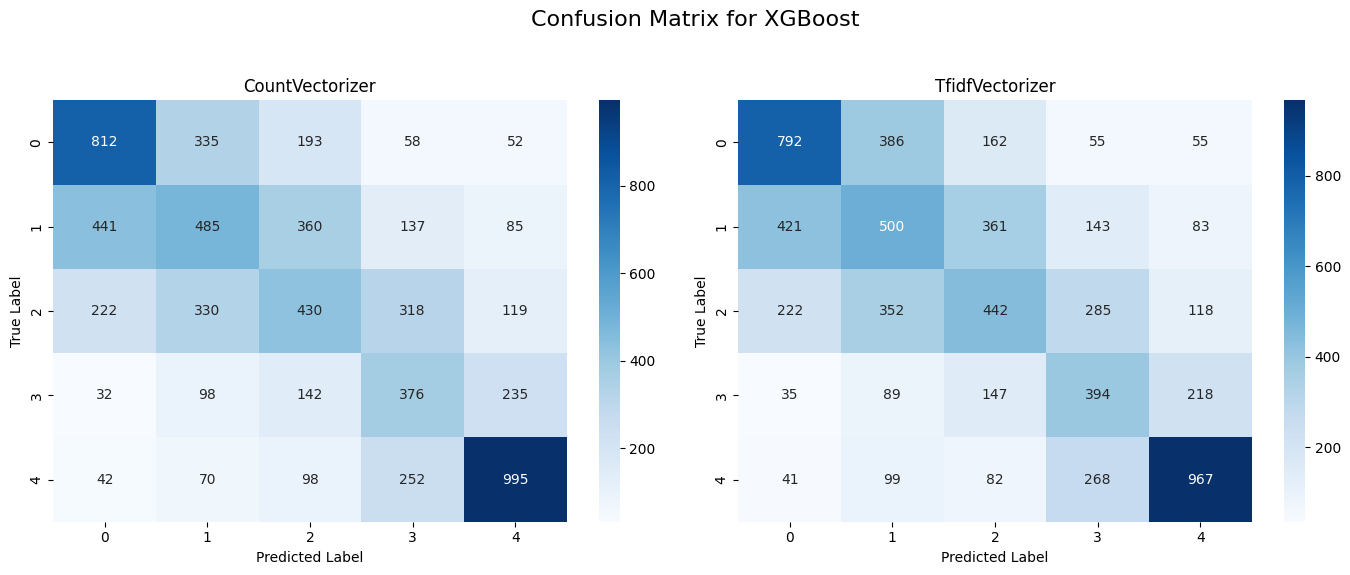

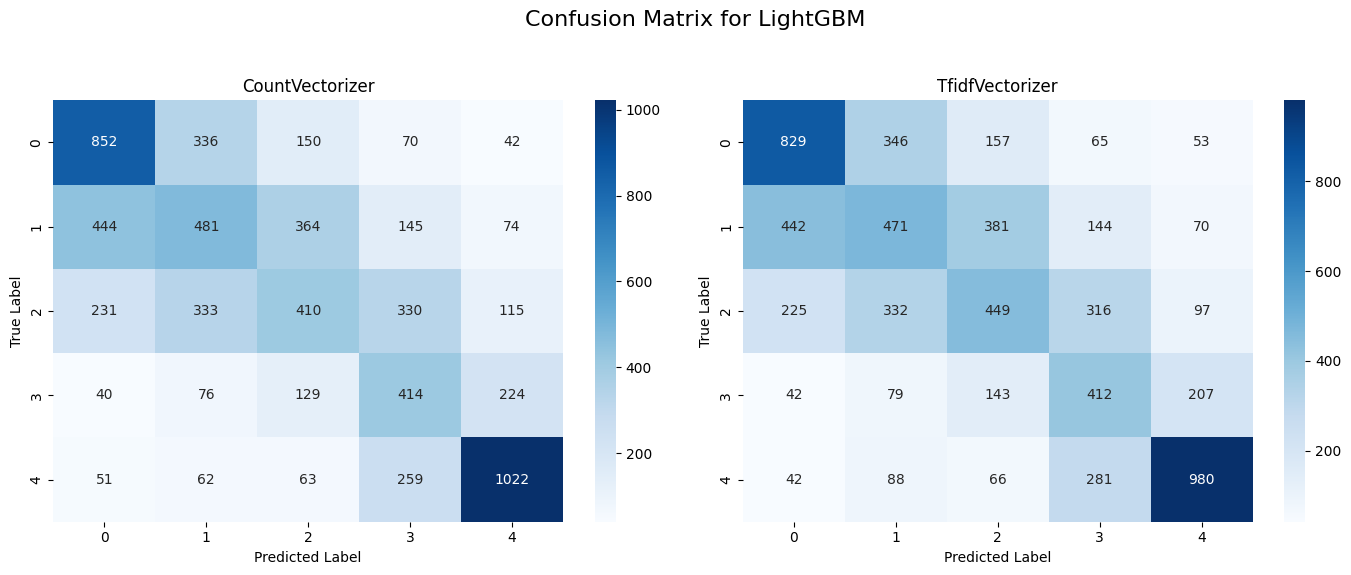

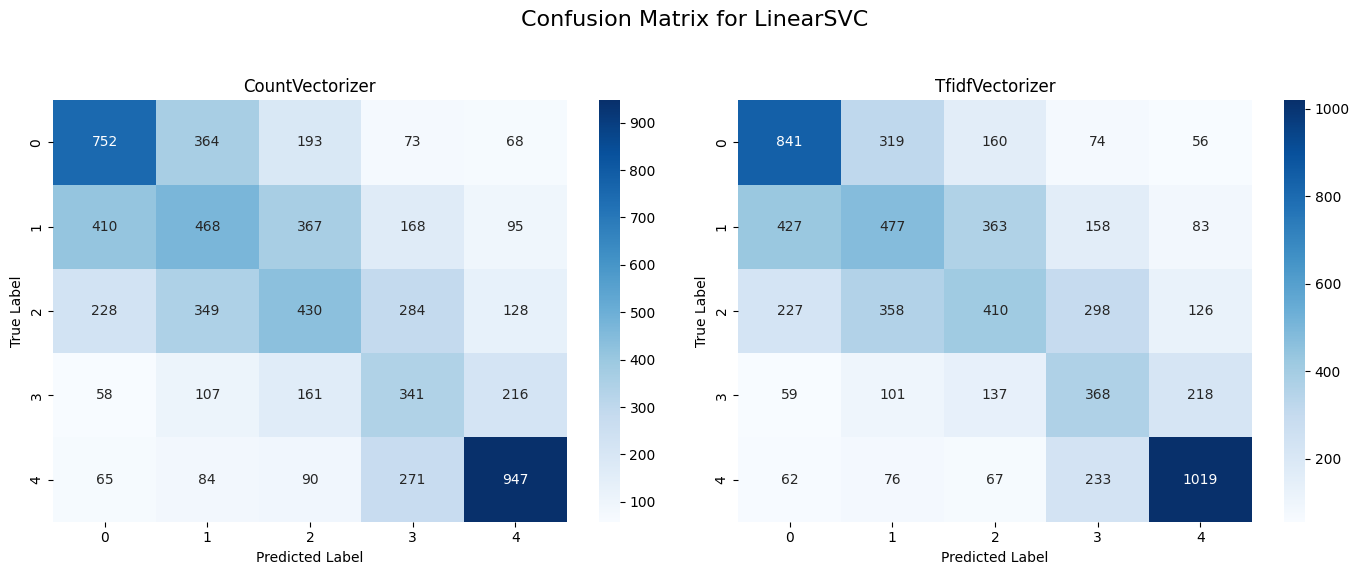

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix_comparison(df: pd.DataFrame):
    """
    Generates side-by-side confusion matrix plots for each model,
    comparing CountVectorizer and TfidfVectorizer.

    Args:
        df (pd.DataFrame): DataFrame containing model results with
                           'Model', 'Vectorizer', and 'Confusion Matrix' columns.
    """
    unique_models = df['Model'].unique()

    for model_name in unique_models:
        model_df = df[df['Model'] == model_name]

        count_matrix = model_df[model_df['Vectorizer'] == 'CountVectorizer']['Confusion Matrix'].iloc[0]
        tfidf_matrix = model_df[model_df['Vectorizer'] == 'TfidfVectorizer']['Confusion Matrix'].iloc[0]

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Confusion Matrix for {model_name}', fontsize=16)

        # Plot CountVectorizer Confusion Matrix
        sns.heatmap(count_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.arange(count_matrix.shape[0]),
                    yticklabels=np.arange(count_matrix.shape[0]),
                    ax=axes[0])
        axes[0].set_title('CountVectorizer')
        axes[0].set_xlabel('Predicted Label')
        axes[0].set_ylabel('True Label')

        # Plot TfidfVectorizer Confusion Matrix
        sns.heatmap(tfidf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.arange(tfidf_matrix.shape[0]),
                    yticklabels=np.arange(tfidf_matrix.shape[0]),
                    ax=axes[1])
        axes[1].set_title('TfidfVectorizer')
        axes[1].set_xlabel('Predicted Label')
        axes[1].set_ylabel('True Label')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
        plt.show()

# Example usage (assuming your DataFrame is named 'results_df')
plot_confusion_matrix_comparison(results)

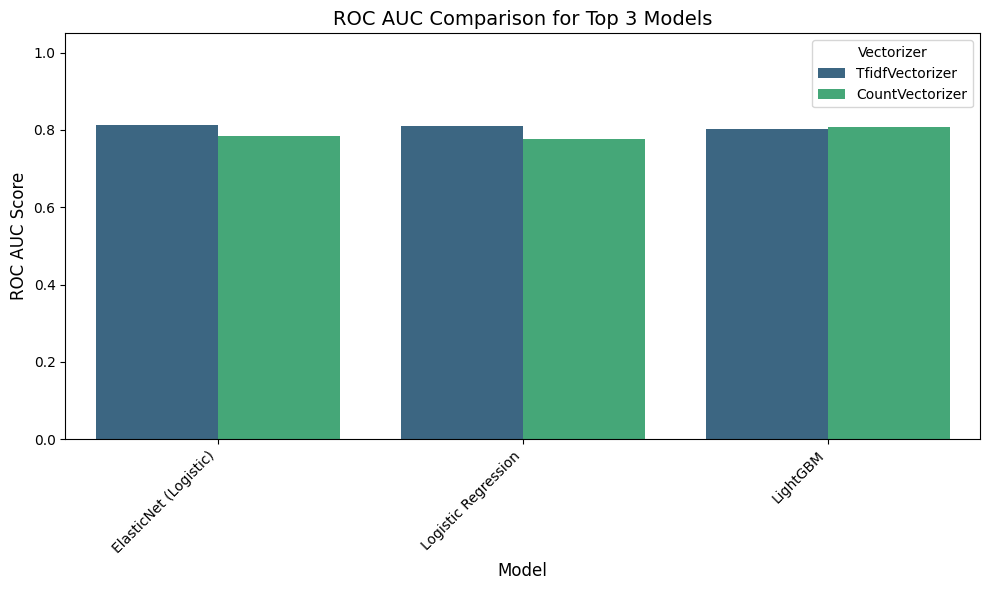

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_roc_auc_comparison_top_n(df: pd.DataFrame, top_n: int = 3):
    """
    Generates a bar plot comparing ROC AUC scores for the top N performing models,
    differentiating between CountVectorizer and TfidfVectorizer.

    Args:
        df (pd.DataFrame): DataFrame containing model results with
                           'Model', 'Vectorizer', and 'ROC AUC' columns.
        top_n (int): The number of top-performing models to display.
    """

    # Filter out rows where ROC AUC is NaN
    roc_auc_df = df.dropna(subset=['ROC AUC'])

    # Find the best ROC AUC for each model
    best_roc_auc_per_model = roc_auc_df.groupby('Model')['ROC AUC'].max().sort_values(ascending=False)

    # Get the top N performing models
    top_models = best_roc_auc_per_model.head(top_n).index.tolist()

    # Filter the DataFrame for the top models
    top_models_df = roc_auc_df[roc_auc_df['Model'].isin(top_models)].sort_values(by='ROC AUC', ascending=False)

    if top_models_df.empty:
        print("No ROC AUC data available for the top models.")
        return

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='ROC AUC', hue='Vectorizer', data=top_models_df, palette='viridis')
    plt.title(f'ROC AUC Comparison for Top {top_n} Models', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('ROC AUC Score', fontsize=12)
    plt.ylim(0, 1.05)  # Set y-axis limit for ROC AUC
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Vectorizer')
    plt.tight_layout()
    plt.show()

# Example usage (assuming your DataFrame is named 'results_df')
plot_roc_auc_comparison_top_n(results, top_n=3)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_performance_plots(df):
    # 1. ROC AUC Comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Top 3 Models ROC AUC Comparison', fontsize=16)
    
    colors = ['#2563eb', '#dc2626', '#16a34a']  # blue, red, green
    
    for vectorizer, ax in zip(['CountVectorizer', 'TfidfVectorizer'], [ax1, ax2]):
        top3 = df[df['Vectorizer'] == vectorizer].nlargest(3, 'ROC AUC')
        
        # Plot ROC curve (approximated)
        for idx, (_, row) in enumerate(top3.iterrows()):
            auc = row['ROC AUC']  # Get ROC AUC value directly
            x = np.linspace(0, 1, 100)
            # Use a better approximation for ROC curve
            beta = np.log(auc / (1 - auc))
            y = 1 / (1 + np.exp(-beta * (x - 0.5)))
            
            ax.plot(x, y, color=colors[idx], 
                   label=f"{row['Model']} (AUC={auc:.3f})")
            
        ax.plot([0, 1], [0, 1], '--', color='gray')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'{vectorizer}')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()
    
    plt.tight_layout()
    plt.savefig('roc_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Performance Metrics Visualization
    metrics = ['accuracy'] + [f'{i}_{metric}' for i in range(5) 
                            for metric in ['precision', 'recall', 'f1-score']]
    
    for vectorizer in ['CountVectorizer', 'TfidfVectorizer']:
        top3 = df[df['Vectorizer'] == vectorizer].nlargest(3, 'ROC AUC')
        
        # Create heatmap data
        metric_data = top3[metrics].values
        
        fig, ax = plt.subplots(figsize=(15, 5))
        im = ax.imshow(metric_data, aspect='auto', cmap='YlOrRd')
        
        # Add colorbar
        plt.colorbar(im)
        
        # Add labels
        ax.set_xticks(np.arange(len(metrics)))
        ax.set_yticks(np.arange(len(top3)))
        
        ax.set_xticklabels(metrics, rotation=45, ha='right')
        ax.set_yticklabels(top3['Model'])
        
        # Add values in cells
        for i in range(len(top3)):
            for j in range(len(metrics)):
                text = ax.text(j, i, f"{metric_data[i, j]:.3f}",
                             ha="center", va="center", color="black")
        
        plt.title(f'Performance Metrics - {vectorizer}')
        plt.tight_layout()
        plt.savefig(f'performance_heatmap_{vectorizer.lower()}.png', dpi=300, bbox_inches='tight')
        plt.close()

def print_performance_summary(df):
    # Print top performers for each metric
    print("\nTop Performers Summary:")
    
    metrics = ['ROC AUC', 'accuracy'] + [f'{i}_{metric}' for i in range(5) 
              for metric in ['precision', 'recall', 'f1-score']]
    
    for vectorizer in ['CountVectorizer', 'TfidfVectorizer']:
        print(f"\n=== {vectorizer} ===")
        vec_df = df[df['Vectorizer'] == vectorizer]
        
        for metric in metrics:
            print(f"\n{metric}:")
            top3 = vec_df.nlargest(3, metric)[['Model', metric]]
            for idx, row in top3.iterrows():
                print(f"{row['Model']}: {row[metric]:.3f}")

def calculate_class_averages(df):
    # Calculate average metrics per class
    metrics = ['precision', 'recall', 'f1-score']
    class_metrics = []
    
    for vectorizer in ['CountVectorizer', 'TfidfVectorizer']:
        print(f"\n=== {vectorizer} Average Class Performance ===")
        vec_df = df[df['Vectorizer'] == vectorizer]
        
        for model in vec_df['Model'].unique():
            model_df = vec_df[vec_df['Model'] == model]
            print(f"\n{model}:")
            
            for metric in metrics:
                values = [model_df[f'{i}_{metric}'].values[0] for i in range(5)]
                avg = np.mean(values)
                std = np.std(values)
                print(f"{metric}: mean={avg:.3f}, std={std:.3f}")
                
                class_metrics.append({
                    'Vectorizer': vectorizer,
                    'Model': model,
                    f'avg_{metric}': avg,
                    f'std_{metric}': std
                })
    
    return pd.DataFrame(class_metrics)

# Execute analysis

create_performance_plots(results)
summary = print_performance_summary(results)
avg_performance = calculate_class_averages(results)

# Save summaries to CSV


# Print top performers
print("\nTop Performers Summary:")
print("\nBy ROC AUC:")
for vectorizer in ['CountVectorizer', 'TfidfVectorizer']:
    print(f"\n{vectorizer}:")
    top3 = results[results['Vectorizer'] == vectorizer].nlargest(3, 'ROC AUC')[['Model', 'ROC AUC']]
    print(top3.to_string(index=False))


Top Performers Summary:

=== CountVectorizer ===

ROC AUC:
LightGBM: 0.807
XGBoost: 0.791
ElasticNet (Logistic): 0.785

accuracy:
LightGBM: 0.504
XGBoost: 0.486
ElasticNet (Logistic): 0.480

0_precision:
LightGBM: 0.566
XGBoost: 0.562
ElasticNet (Logistic): 0.552

0_recall:
Random Forest: 0.714
LightGBM: 0.615
XGBoost: 0.595

0_f1-score:
LightGBM: 0.589
XGBoost: 0.578
Random Forest: 0.563

1_precision:
LightGBM: 0.371
Random Forest: 0.353
ElasticNet (Logistic): 0.349

1_recall:
LightGBM: 0.347
XGBoost: 0.341
Logistic Regression: 0.325

1_f1-score:
LightGBM: 0.358
XGBoost: 0.344
ElasticNet (Logistic): 0.337

2_precision:
LightGBM: 0.390
XGBoost: 0.359
ElasticNet (Logistic): 0.349

2_recall:
LightGBM: 0.338
ElasticNet (Logistic): 0.336
Logistic Regression: 0.328

2_f1-score:
LightGBM: 0.362
ElasticNet (Logistic): 0.342
XGBoost: 0.336

3_precision:
LightGBM: 0.465
XGBoost: 0.453
ElasticNet (Logistic): 0.441

3_recall:
LightGBM: 0.443
ElasticNet (Logistic): 0.430
XGBoost: 0.423

3_f1-scor

In [16]:
def print_side_by_side_comparison(df):
    # Get top 3 for each vectorizer
    cv_top3 = df[df['Vectorizer'] == 'CountVectorizer'].nlargest(3, 'ROC AUC')[['Model', 'ROC AUC']]
    tfidf_top3 = df[df['Vectorizer'] == 'TfidfVectorizer'].nlargest(3, 'ROC AUC')[['Model', 'ROC AUC']]
    
    # Format each model-AUC pair
    cv_lines = cv_top3.apply(lambda x: f"{x['Model']:<20} {x['ROC AUC']:.3f}", axis=1).tolist()
    tfidf_lines = tfidf_top3.apply(lambda x: f"{x['Model']:<20} {x['ROC AUC']:.3f}", axis=1).tolist()
    
    # Print headers
    print("\nTop 3 Models by ROC AUC:")
    print("-" * 70)
    print(f"{'CountVectorizer':<35} {'TfidfVectorizer':<35}")
    print("-" * 70)
    
    # Print each row side by side
    for cv_line, tfidf_line in zip(cv_lines, tfidf_lines):
        print(f"{cv_line:<35} {tfidf_line:<35}")

# Usage
print_side_by_side_comparison(results)



Top 3 Models by ROC AUC:
----------------------------------------------------------------------
CountVectorizer                     TfidfVectorizer                    
----------------------------------------------------------------------
LightGBM             0.807          ElasticNet (Logistic) 0.812        
XGBoost              0.791          Logistic Regression  0.811         
ElasticNet (Logistic) 0.785         LightGBM             0.803         


In [17]:
def print_side_by_side_comparison(df):
    metrics = ['ROC AUC', 'accuracy']
    class_metrics = ['precision', 'recall', 'f1-score']
    
    def calculate_class_avg(row, metric):
        # Calculate average of metric across all classes
        values = [row[f'{i}_{metric}'] for i in range(5)]
        return np.mean(values)
    
    # Get top 3 for each vectorizer based on ROC AUC
    cv_top3 = df[df['Vectorizer'] == 'CountVectorizer'].nlargest(3, 'ROC AUC')
    tfidf_top3 = df[df['Vectorizer'] == 'TfidfVectorizer'].nlargest(3, 'ROC AUC')
    
    # Calculate averages for each class metric
    for df_top3 in [cv_top3, tfidf_top3]:
        for metric in class_metrics:
            df_top3[f'avg_{metric}'] = df_top3.apply(lambda x: calculate_class_avg(x, metric), axis=1)
    
    # Print headers
    print("\nModel Performance Comparison:")
    print("-" * 100)
    print(f"{'CountVectorizer':<50} {'TfidfVectorizer':<50}")
    print("-" * 100)
    
    # Header for metrics
    metrics_header = "Model ROC_AUC Acc Prec Rec F1"
    print(f"{metrics_header:<50} {metrics_header:<50}")
    print("-" * 100)
    
    # Print each row side by side with all metrics
    for (_, cv_row), (_, tfidf_row) in zip(cv_top3.iterrows(), tfidf_top3.iterrows()):
        cv_line = (f"{cv_row['Model']:<20} "
                  f"{cv_row['ROC AUC']:>.3f} "
                  f"{cv_row['accuracy']:>.3f} "
                  f"{cv_row['avg_precision']:>.3f} "
                  f"{cv_row['avg_recall']:>.3f} "
                  f"{cv_row['avg_f1-score']:>.3f}")
        
        tfidf_line = (f"{tfidf_row['Model']:<20} "
                     f"{tfidf_row['ROC AUC']:>.3f} "
                     f"{tfidf_row['accuracy']:>.3f} "
                     f"{tfidf_row['avg_precision']:>.3f} "
                     f"{tfidf_row['avg_recall']:>.3f} "
                     f"{tfidf_row['avg_f1-score']:>.3f}")
        
        print(f"{cv_line:<50} {tfidf_line:<50}")

# Usage
print_side_by_side_comparison(results)


Model Performance Comparison:
----------------------------------------------------------------------------------------------------
CountVectorizer                                    TfidfVectorizer                                   
----------------------------------------------------------------------------------------------------
Model ROC_AUC Acc Prec Rec F1                      Model ROC_AUC Acc Prec Rec F1                     
----------------------------------------------------------------------------------------------------
LightGBM             0.807 0.504 0.491 0.500 0.494 ElasticNet (Logistic) 0.812 0.501 0.488 0.498 0.491
XGBoost              0.791 0.486 0.474 0.483 0.477 Logistic Regression  0.811 0.500 0.488 0.496 0.491
ElasticNet (Logistic) 0.785 0.480 0.470 0.477 0.473 LightGBM             0.803 0.494 0.482 0.491 0.485
